In [1]:
#Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lectura de los archivos necesarios
df=pd.read_csv("C:/master_ugr/TFM/resultados/correcciones/regeneracion_x_visita.csv", delimiter=";", decimal=",")

In [3]:
#Optimización del dataframe
df_cod_nom = df.replace({328: "Q. faginea", 
               7150: "Q. ilex", 
               127 :"Pinus", 
               2247:"Fraxinus", 
               6206:"Cedrus",326:"Q. pyrenaica"})
df_cod_nom

,id_punto,id_visita,cod_especie,especie,N_plantulas
0,1.0,1,Q. faginea,Quercus faginea Lam.,62.0
1,1.0,1,Q. ilex,Quercus ilex L.,98.0
2,2.0,2,Q. faginea,Quercus faginea Lam.,56.0
3,2.0,2,Q. ilex,Quercus ilex L.,64.0
4,2.0,2,Pinus,Pinus,1.0
5,3.0,3,Q. faginea,Quercus faginea Lam.,17.0
6,3.0,3,Q. ilex,Quercus ilex L.,38.0
7,4.0,4,Q. faginea,Quercus faginea Lam.,12.0
8,4.0,4,Q. ilex,Quercus ilex L.,76.0
9,5.0,5,Q. faginea,Quercus faginea Lam.,47.0


In [4]:
#Limpieza del dataframe
df_nom=df_cod_nom.drop(["id_punto", "especie"], axis=1)
df_nom

,id_visita,cod_especie,N_plantulas
0,1,Q. faginea,62.0
1,1,Q. ilex,98.0
2,2,Q. faginea,56.0
3,2,Q. ilex,64.0
4,2,Pinus,1.0
5,3,Q. faginea,17.0
6,3,Q. ilex,38.0
7,4,Q. faginea,12.0
8,4,Q. ilex,76.0
9,5,Q. faginea,47.0


In [5]:
df_nom.columns = ["id_visita", "nombre_especie", "n_plantulas"]

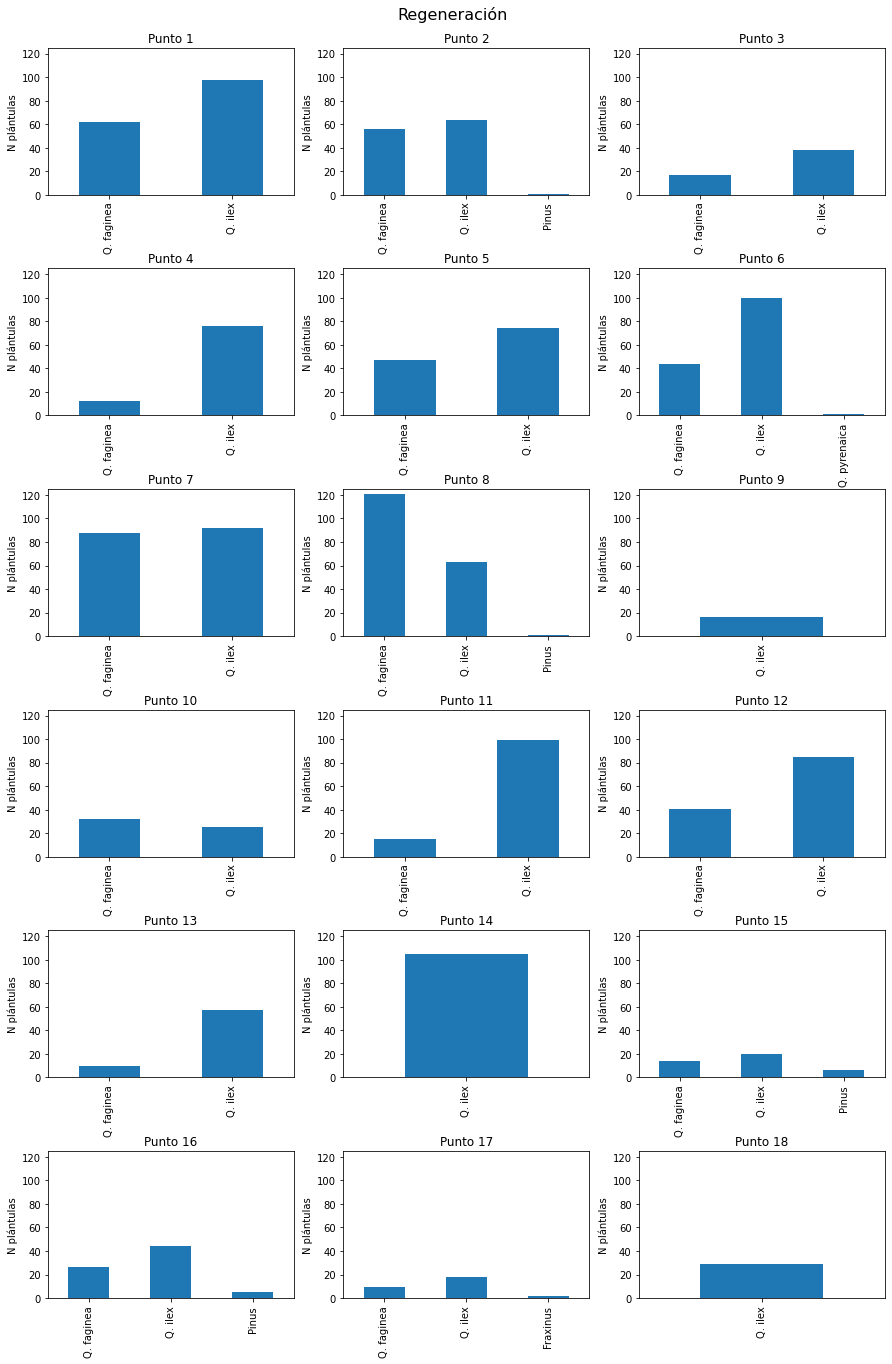

In [8]:
#Visualización de las gráficas de regeneración por cada punto muestreado
puntos = range (1,19)

fig, axs = plt.subplots(6,3, figsize = (15,23))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Regeneración", fontsize=16, y=0.905)

for i, ax in zip(puntos, axs.ravel()):
    dens_puntos = df_nom["id_visita"] == i
    df_dens_puntos=df_nom[dens_puntos]
    df_dens_puntos.plot(ax=ax, kind = "bar", x="nombre_especie", y="n_plantulas", legend=False)
    ax.set_title("Punto " + str(i))
    ax.set_xlabel("")
    ax.set_ylabel("N plántulas")
    ax.set_ylim(0,125)